In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("advertising.csv")

In [ ]:
df.head()

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
y = df["sales"]
X = df.drop("sales",axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
# Scaling data

In [ ]:
ss = StandardScaler()

In [ ]:
X_train_ss = ss.fit_transform(X_train)

In [ ]:
X_test_ss = ss.transform(X_test)

In [ ]:
# Neural Network

In [ ]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(2, activation="relu", input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1)
    
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd", loss="mse")

In [ ]:
trained_model = model.fit(X_train_ss, y_train, epochs=50)

Train on 140 samples
Epoch 1/50
140/140 [==============================] - 0s 2ms/sample - loss: 149.9138
Epoch 2/50
140/140 [==============================] - 0s 132us/sample - loss: 27.0958
Epoch 3/50
140/140 [==============================] - 0s 138us/sample - loss: 8.1577
Epoch 4/50
140/140 [==============================] - 0s 159us/sample - loss: 6.2688
Epoch 5/50
140/140 [==============================] - 0s 242us/sample - loss: 5.2528
Epoch 6/50
140/140 [==============================] - 0s 187us/sample - loss: 5.2936
Epoch 7/50
140/140 [==============================] - 0s 173us/sample - loss: 4.4484
Epoch 8/50
140/140 [==============================] - 0s 142us/sample - loss: 5.8327
Epoch 9/50
140/140 [==============================] - 0s 178us/sample - loss: 3.3541
Epoch 10/50
140/140 [==============================] - 0s 128us/sample - loss: 2.9631
Epoch 11/50
140/140 [==============================] - 0s 210us/sample - loss: 3.1261
Epoch 12/50
140/140 [====================

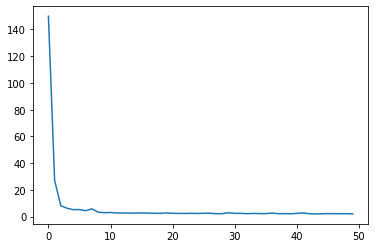

In [ ]:
plt.plot(trained_model.history["loss"])

In [ ]:
# Testing

In [ ]:
y_pred = model.predict(X_test_ss)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.9508852615065774